# WHO Daten einlesen

# Einlesen der aufbereitenden Daten

In [1]:
import pandas as pd
WHO_world = pd.read_csv("WHO_Corona_global.csv")
WHO_world["Date"]= pd.to_datetime(WHO_world["Date"]) 

## Deutschland filtern

In [2]:
WHO_world["Date"]= pd.to_datetime(WHO_world["Date"]) 
Deutschland = WHO_world.loc[WHO_world["Country/Region"] == "Germany"].sort_values("Date").reset_index(drop=True)
Deutschland.to_csv("WHO_Corona_Deutschland.csv", index=False)
Deutschland

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Germany,0,0,0.0,0.0,0,0,0
1,2020-01-23,Germany,0,0,0.0,0.0,0,0,0
2,2020-01-24,Germany,0,0,0.0,0.0,0,0,0
3,2020-01-25,Germany,0,0,0.0,0.0,0,0,0
4,2020-01-26,Germany,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
368,2021-01-24,Germany,2147769,52296,1840970.0,254503.0,10078,423,14809
369,2021-01-25,Germany,2154656,53127,1859936.0,241593.0,6887,831,18966
370,2021-01-26,Germany,2164043,53619,1881933.0,228491.0,9387,492,21997
371,2021-01-27,Germany,2179679,54498,2043773.0,81408.0,15636,879,161840


# Plots

## Daten einlesen

In [3]:
import pandas as pd

Deutschland = pd.read_csv("WHO_Corona_Deutschland.csv")
Deutschland["Date"]= pd.to_datetime(Deutschland["Date"]) 
Deutschland

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Germany,0,0,0.0,0.0,0,0,0
1,2020-01-23,Germany,0,0,0.0,0.0,0,0,0
2,2020-01-24,Germany,0,0,0.0,0.0,0,0,0
3,2020-01-25,Germany,0,0,0.0,0.0,0,0,0
4,2020-01-26,Germany,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
368,2021-01-24,Germany,2147769,52296,1840970.0,254503.0,10078,423,14809
369,2021-01-25,Germany,2154656,53127,1859936.0,241593.0,6887,831,18966
370,2021-01-26,Germany,2164043,53619,1881933.0,228491.0,9387,492,21997
371,2021-01-27,Germany,2179679,54498,2043773.0,81408.0,15636,879,161840


***Hinweis: Im Vergleich zum RKI scheinen die täglich gemeldeten Zahlen abzuweichen*** die Summe stimmt aber halbwegs

## Plot 1: Corona kumulierte Infektionszahlen in Deutschland

Wir starten nun mit einem einfachen Plot zu den kumulierten Fallzahlen in Deutschland

Wir greifen unten mit im Plot Befehl direkt auf die jeweilgen Spalten im pandas Dataframe zu

`plt.plot(Deutschland["Date"],Deutschland["Confirmed"])`

***Damit die Darstellung des Datums richtig funktioniert, ist es wichtig, dass der Deutschland["Date"] als `datetime` definiert ist!***


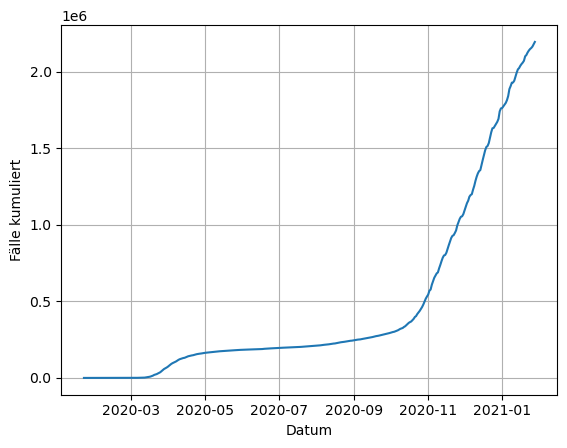

In [4]:
import matplotlib.pyplot as plt

# Allgemein
plt.style.use('default') # default stil einstellen (auch andere stile z.B. auch "seaborn-darkgrid" möglich )

# Achsen
plt.ylabel("Fälle kumuliert")
plt.xlabel("Datum")

# Plot
plt.plot(Deutschland["Date"],Deutschland["Confirmed"])
plt.grid()

plt.show()

### Gleicher plot mit objektorientierter Schreibweise

Da viele Funktionen mit der **objektorientierten Schreibweise** funktioniern gehen wir gleich in diese über.

Dafür verwenden wir immer folgende Schreibweise:

`fig , ax = plt.subplots()`

wobei `fig` das Objekt ist in dem sich alle `ax` (subplots) befinden. In diesem Fall ist es nur ein subplot

statt `plt`.plot schreiben wir nun also `ax`.plt weil wir auf den subplot `ax` plotten wollen


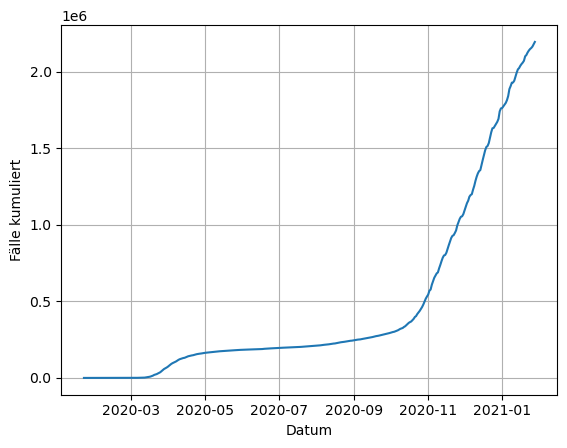

In [5]:
import matplotlib.pyplot as plt

# Allgemein
plt.style.use('default') # default stil einstellen (auch andere stile z.B. auch "seaborn-darkgrid" möglich )

# Set Figure
fig , ax = plt.subplots()

# Achsen
ax.set_ylabel("Fälle kumuliert")
ax.set_xlabel("Datum")

# Plot
ax.plot(Deutschland["Date"],Deutschland["Confirmed"])
ax.grid()

plt.show()

### Mehrere Subplots

In plt.subplots() kann mit `ncols` die Anzahl der Spalten und mit `nrows` die Anzahl der Zeilen definiert werden. Wir beginnen zunächst mit `ncols` 

### plt.subplots(`ncols=2`)

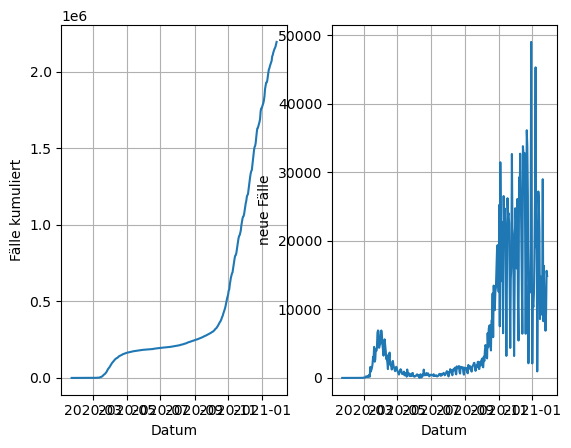

In [6]:
import matplotlib.pyplot as plt

# Allgemein
plt.style.use('default') # default stil einstellen (auch andere stile z.B. auch "seaborn-darkgrid" möglich )

# Set Figure
fig , (ax1,ax2) = plt.subplots(ncols=2)

# Plot 1 : ax1 - Fälle kumuliert

# Achsen
ax1.set_ylabel("Fälle kumuliert")
ax1.set_xlabel("Datum")

# Plot
ax1.plot(Deutschland["Date"],Deutschland["Confirmed"])
ax1.grid()

# Plot 2 : ax2 - neue Fälle

# Achsen
ax2.set_ylabel("neue Fälle")
ax2.set_xlabel("Datum")

# Plot
ax2.plot(Deutschland["Date"],Deutschland["New cases"])
ax2.grid()


plt.show()

Nun sind einige Sachen zu beheben:
1. Die Größe anpassen
2. Die Überschneidungen entfernen

#### Größe festlegen mit plt.subplots(ncols=2, `figsize=(10,4)`)

Die Größe stellen wir mit dem Parameter `figsize=(x,y)` in `subplots()` ein

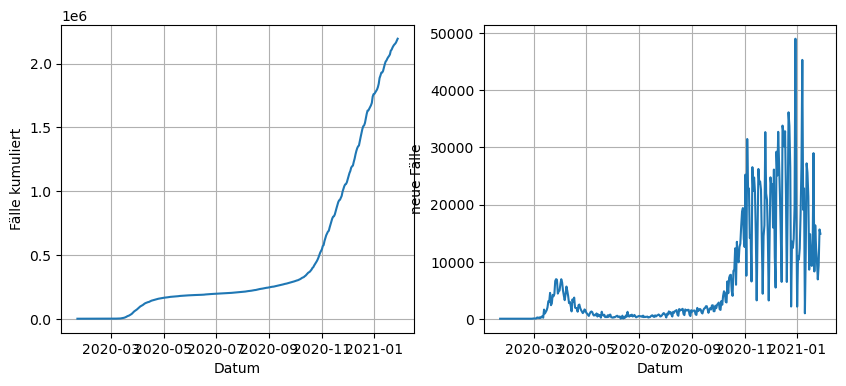

In [7]:
import matplotlib.pyplot as plt

# Allgemein
plt.style.use('default') # default stil einstellen (auch andere stile z.B. auch "seaborn-darkgrid" möglich )

# Set Figure
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(10,4))

# Plot 1 : ax1 - Fälle kumuliert

# Achsen
ax1.set_ylabel("Fälle kumuliert")
ax1.set_xlabel("Datum")

# Plot
ax1.plot(Deutschland["Date"],Deutschland["Confirmed"])
ax1.grid()

# Plot 2 : ax2 - neue Fälle

# Achsen
ax2.set_ylabel("neue Fälle")
ax2.set_xlabel("Datum")

# Plot
ax2.plot(Deutschland["Date"],Deutschland["New cases"])
ax2.grid()


plt.show()

#### Überschneidungen verhindern mit `plt.tight_layout()`

Durch den Befehl `plt.tight_layout()` werden Überschneidungen automatisch behoben

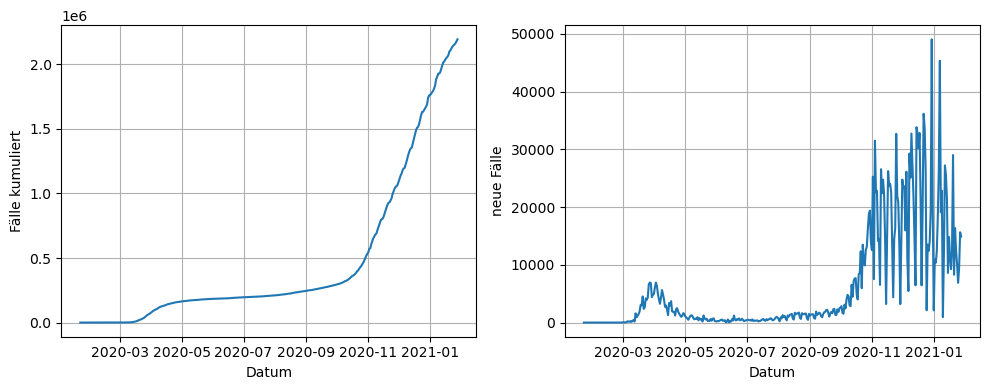

In [8]:
import matplotlib.pyplot as plt

# Allgemein
plt.style.use('default') # default stil einstellen (auch andere stile z.B. auch "seaborn-darkgrid" möglich )

# Set Figure
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(10,4))

# Plot 1 : ax1 - Fälle kumuliert

# Achsen
ax1.set_ylabel("Fälle kumuliert")
ax1.set_xlabel("Datum")

# Plot
ax1.plot(Deutschland["Date"],Deutschland["Confirmed"])
ax1.grid()

# Plot 2 : ax2 - neue Fälle

# Achsen
ax2.set_ylabel("neue Fälle")
ax2.set_xlabel("Datum")

# Plot
ax2.plot(Deutschland["Date"],Deutschland["New cases"])
ax2.grid()

plt.tight_layout()
plt.show()

### Plot mit plt.subplots(`nrows=2`,figsize=(4,10))

Wir wollen nun die Plots übereinander darstellen, stellen also ein `nrows=2`

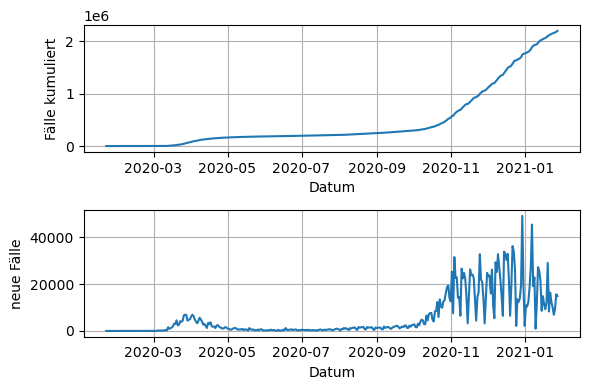

In [9]:
import matplotlib.pyplot as plt

# Allgemein
plt.style.use('default') # default stil einstellen (auch andere stile z.B. auch "seaborn-darkgrid" möglich )

# Set Figure
fig , (ax1,ax2) = plt.subplots(nrows=2,figsize=(6,4))

# Plot 1 : ax1 - Fälle kumuliert

# Achsen
ax1.set_ylabel("Fälle kumuliert")
ax1.set_xlabel("Datum")

# Plot
ax1.plot(Deutschland["Date"],Deutschland["Confirmed"])
ax1.grid()

# Plot 2 : ax2 - neue Fälle

# Achsen
ax2.set_ylabel("neue Fälle")
ax2.set_xlabel("Datum")

# Plot
ax2.plot(Deutschland["Date"],Deutschland["New cases"])
ax2.grid()

plt.tight_layout()
plt.show()

#### x-Achse teilen

Da beide plots die gleiche x-Achse besitzen wäre es sinvoll die Beschriftung des oberen Plots zu entfernen. Dies geht leicht mit der option `sharex=True`

Weiterhin entfernen wir die Achsenbeschriftung für den oberen Plot

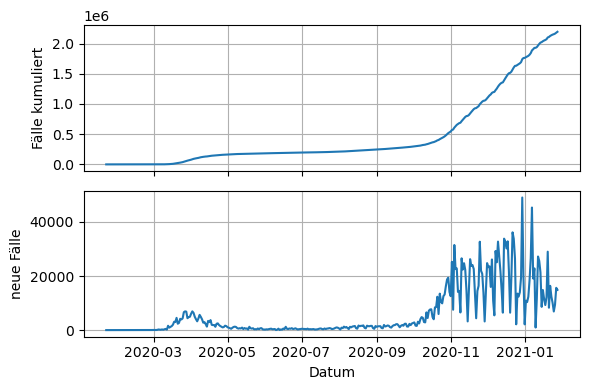

In [10]:
import matplotlib.pyplot as plt

# Allgemein
plt.style.use('default') # default stil einstellen (auch andere stile z.B. auch "seaborn-darkgrid" möglich )

# Set Figure
fig , (ax1,ax2) = plt.subplots(nrows=2,figsize=(6,4), sharex=True)

# Plot 1 : ax1 - Fälle kumuliert

# Achsen
ax1.set_ylabel("Fälle kumuliert")
#ax1.set_xlabel("Datum")

# Plot
ax1.plot(Deutschland["Date"],Deutschland["Confirmed"])
ax1.grid()

# Plot 2 : ax2 - neue Fälle

# Achsen
ax2.set_ylabel("neue Fälle")
ax2.set_xlabel("Datum")

# Plot
ax2.plot(Deutschland["Date"],Deutschland["New cases"])
ax2.grid()

plt.tight_layout()
plt.show()

#### x-Ticks mit Datum besser formatieren

Die standardeinstellung ist jedoch nicht sonderlich praktisch, da die Daten auf der x-Achse eher zufällig gewählt werden. Sinnvoller wäre es z.B. jeden Monatsbeginn darzustellen:

Dafür benötigen wir noch den Teil `dates` aus der `matplotlib` Bibliothek

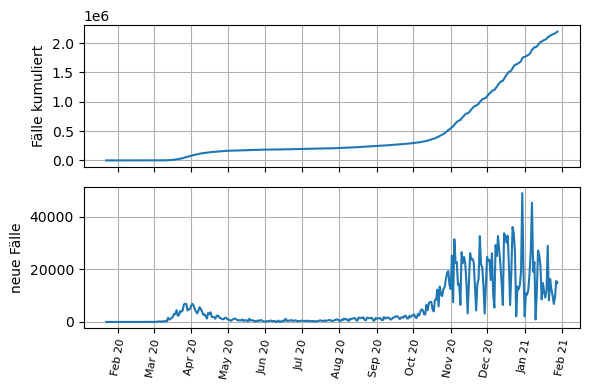

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates

# Allgemein
plt.style.use('default') # default stil einstellen (auch andere stile z.B. auch "seaborn-darkgrid" möglich )

# Set Figure
fig , (ax1,ax2) = plt.subplots(nrows=2,figsize=(6,4), sharex=True)

# Plot 1 : ax1 - Fälle kumuliert

# Achsen
ax1.set_ylabel("Fälle kumuliert")
#ax1.set_xlabel("Datum")

# Plot
ax1.plot(Deutschland["Date"],Deutschland["Confirmed"])
ax1.grid()

# Plot 2 : ax2 - neue Fälle

# Achsen
ax2.set_ylabel("neue Fälle")
#ax2.set_xlabel("Datum")

# Plot
ax2.plot(Deutschland["Date"],Deutschland["New cases"])
ax2.grid()


# x ticks Anpassen
ax2.xaxis.set_major_locator(dates.MonthLocator(interval=1)) # jeden Monat ein Tick
ax2.xaxis.set_major_formatter(dates.DateFormatter('%b %y')) # Darstellung Monatsnamekurz + Jahr

# x Tick Schrift Formatierung (Variante 1: eigene Einstellungen)
labels = ax2.get_xticklabels(); # labels auslesen um diese noch mal zu formatieren
plt.setp(labels, rotation=80, fontsize=8); # Labels drehen

# x Tick Schrift Formatierung (Variante 2: automatisch)
#fig.autofmt_xdate()


plt.tight_layout()
plt.show()



### Ein Plot mit zwei y-Achsen

Um in einen Plot zwei y-Achsen zu bekommen erstellt man für die zweite y-Achse einen plot mit `ax2 = ax1.twinx()`

Dafür müssen wir den subplot auch noch anpassen und die zweite ax entfernen (die wird ja erst mit twinx() erstellt) und auch ncols entfernen

`fig , ax1 = plt.subplots(figsize=(6,4))`

Weiterhin müssen wir unsere Anpassung der xticks von `ax2` auf `ax1` ändern


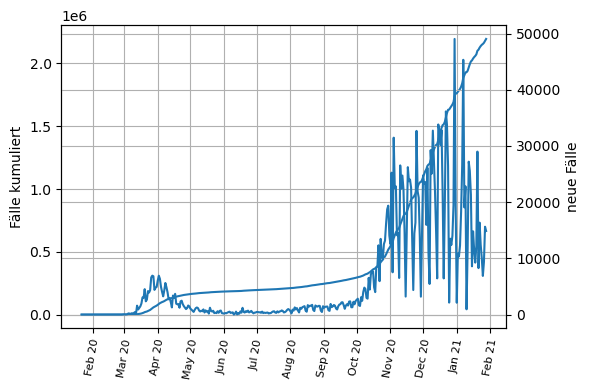

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates

# Allgemein
plt.style.use('default') # default stil einstellen (auch andere stile z.B. auch "seaborn-darkgrid" möglich )

# Set Figure
fig , ax1 = plt.subplots(figsize=(6,4))

# Plot 1 : ax1 - Fälle kumuliert

# Achsen
ax1.set_ylabel("Fälle kumuliert")
#ax1.set_xlabel("Datum")

# Plot
ax1.plot(Deutschland["Date"],Deutschland["Confirmed"])
ax1.grid()

# Plot 2 : ax2 - neue Fälle

ax2 = ax1.twinx()

# Achsen
ax2.set_ylabel("neue Fälle")
#ax2.set_xlabel("Datum")

# Plot
ax2.plot(Deutschland["Date"],Deutschland["New cases"])
ax2.grid()


# x ticks Anpassen
ax1.xaxis.set_major_locator(dates.MonthLocator(interval=1)) # jeden Monat ein Tick
ax1.xaxis.set_major_formatter(dates.DateFormatter('%b %y')) # Darstellung Monatsnamekurz + Jahr

# x Tick Schrift Formatierung (Variante 1: eigene Einstellungen)
labels = ax1.get_xticklabels(); # labels auslesen um diese noch mal zu formatieren
plt.setp(labels, rotation=80, fontsize=8); # Labels drehen

# x Tick Schrift Formatierung (Variante 2: automatisch)
#fig.autofmt_xdate()


plt.tight_layout()
plt.show()



#### y-Achsen mit gleicher Einteilung  (bei zwei y-Achsen, damit Gitter wieder passt)

Dafür brauchen wir zusätlich noch `ticker` von `matplotlib` und erstellen mit folgendem Code jeweils 6 Ticks auf beiden y-achsen

- `nticks=6` # Anzahl Ticks für Achse 1 und 2
- `ax1.yaxis.set_major_locator(tkr.LinearLocator(nticks))`
- `ax2.yaxis.set_major_locator(tkr.LinearLocator(nticks))`

Weiterhin stellen wir neue min/max Werte für die y-Achsen ein
- `ax1.set_ylim(bottom=0, top=2.5e6)` # Achse 1 Limits
- `ax2.set_ylim(bottom=0, top=0.05e6)` # Achse 2 Limits

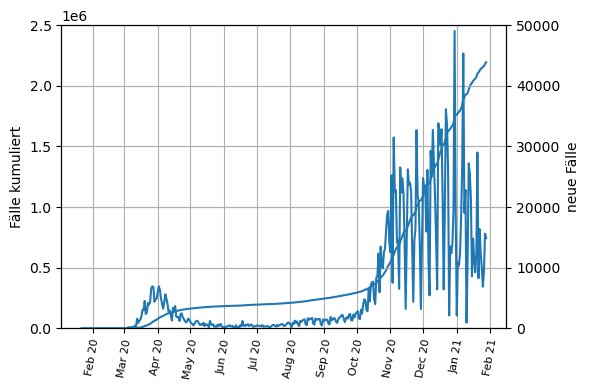

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as tkr 

# Allgemein
plt.style.use('default') # default stil einstellen (auch andere stile z.B. auch "seaborn-darkgrid" möglich )

# Set Figure
fig , ax1 = plt.subplots(figsize=(6,4))

# Plot 1 : ax1 - Fälle kumuliert

# Achsen
ax1.set_ylabel("Fälle kumuliert")
#ax1.set_xlabel("Datum")

# Plot
ax1.plot(Deutschland["Date"],Deutschland["Confirmed"])
ax1.grid()

# Plot 2 : ax2 - neue Fälle
ax2 = ax1.twinx()

# Achsen
ax2.set_ylabel("neue Fälle")
#ax2.set_xlabel("Datum")

# Plot
ax2.plot(Deutschland["Date"],Deutschland["New cases"])
ax2.grid()

# y ticks Anpassen
ax1.set_ylim(bottom=0, top=2.5e6) # Achse 1 Limits
ax2.set_ylim(bottom=0, top=0.05e6) # Achse 2 Limits

nticks=6 # Anzahl Ticks für Achse 1 und 2
ax1.yaxis.set_major_locator(tkr.LinearLocator(nticks))
ax2.yaxis.set_major_locator(tkr.LinearLocator(nticks))

# x ticks Anpassen
ax1.xaxis.set_major_locator(dates.MonthLocator(interval=1)) # jeden Monat ein Tick
ax1.xaxis.set_major_formatter(dates.DateFormatter('%b %y')) # Darstellung Monatsnamekurz + Jahr

# x Tick Schrift Formatierung (Variante 1: eigene Einstellungen)
labels = ax1.get_xticklabels(); # labels auslesen um diese noch mal zu formatieren
plt.setp(labels, rotation=80, fontsize=8); # Labels drehen

# x Tick Schrift Formatierung (Variante 2: automatisch)
#fig.autofmt_xdate()

plt.tight_layout()
plt.show()

#### Farben für die zwei y-Achsen anpassen zur besseren Zuordnung

Zunächst soll die Linie eine andere Farbe bekommen, dies stellen wir über den parameter `color` im plot ein

In diesem Fall wurden die zwei Farben `'tab:blue'` und `'tab:gray'` verwendet

- `ax1.plot(Deutschland["Date"],Deutschland["Confirmed"], color='tab:blue')`
- `ax2.plot(Deutschland["Date"],Deutschland["New cases"], color='tab:gray')`


- `ax1.set_ylabel("Fälle kumuliert", color='tab:blue')`
- `ax2.set_ylabel('Neue Fälle', color='tab:gray')`
- `ax1.tick_params(colors='tab:blue', which='both', axis="y")`
- `ax2.tick_params(colors='tab:gray', which='both', axis="y")`

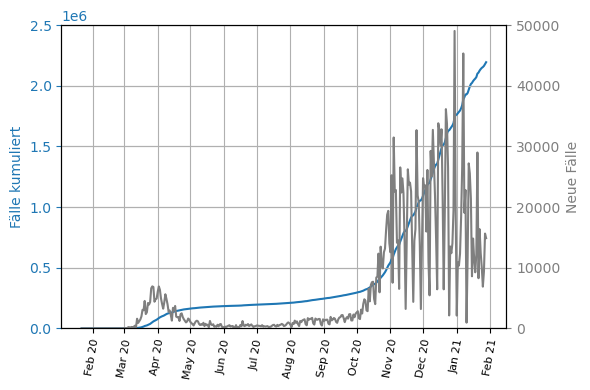

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as tkr 

# Allgemein
plt.style.use('default') # default stil einstellen (auch andere stile z.B. auch "seaborn-darkgrid" möglich )

# Set Figure
fig , ax1 = plt.subplots(figsize=(6,4))

# Plot 1 : ax1 - Fälle kumuliert

# Plot
ax1.plot(Deutschland["Date"],Deutschland["Confirmed"], color='tab:blue')
ax1.grid()

# Plot 2 : ax2 - neue Fälle
ax2 = ax1.twinx()

# Plot
ax2.plot(Deutschland["Date"],Deutschland["New cases"], color='tab:gray')
ax2.grid()

# Farben der zwei y-Achsen anpassen (mit Beschriftung)
ax1.set_ylabel("Fälle kumuliert", color='tab:blue')
ax2.set_ylabel('Neue Fälle', color='tab:gray')
ax1.tick_params(colors='tab:blue', which='both', axis="y") 
ax2.tick_params(colors='tab:gray', which='both', axis="y") 

# y ticks Anpassen
ax1.set_ylim(bottom=0, top=2.5e6) # Achse 1 Limits
ax2.set_ylim(bottom=0, top=0.05e6) # Achse 2 Limits

nticks=6 # Anzahl Ticks für Achse 1 und 2
ax1.yaxis.set_major_locator(tkr.LinearLocator(nticks))
ax2.yaxis.set_major_locator(tkr.LinearLocator(nticks))

# x ticks Anpassen
ax1.xaxis.set_major_locator(dates.MonthLocator(interval=1)) # jeden Monat ein Tick
ax1.xaxis.set_major_formatter(dates.DateFormatter('%b %y')) # Darstellung Monatsnamekurz + Jahr

# x Tick Schrift Formatierung (Variante 1: eigene Einstellungen)
labels = ax1.get_xticklabels(); # labels auslesen um diese noch mal zu formatieren
plt.setp(labels, rotation=80, fontsize=8); # Labels drehen

# x Tick Schrift Formatierung (Variante 2: automatisch)
#fig.autofmt_xdate()

plt.tight_layout()
plt.show()

#### Fläche unter der Linie der neue Fälle füllen

mit `fill_between()` wird nun die Fläche unter den neuen Flächen gefüllt, da diese durch die starken Schwankungen so besser sichtbar sind

weiterhin wird der `alpha` Wert der Füllung auf 0.25 und für den plot auf 0.5 gesenkt

- `ax2.fill_between(Deutschland["Date"], Deutschland["New cases"], 0, facecolor ='tab:gray', alpha=0.25)`
- `ax2.plot(Deutschland["Date"],Deutschland["New cases"], color='tab:gray', alpha=0.5)`

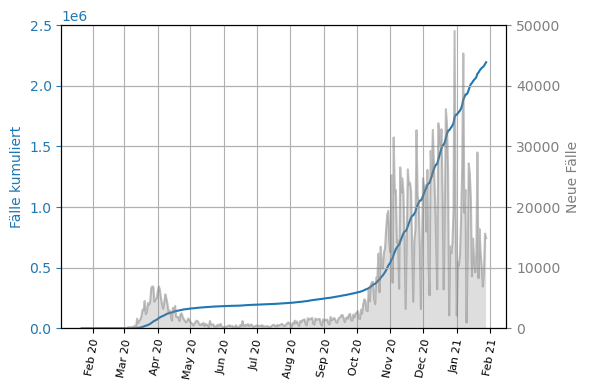

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as tkr 

# Allgemein
plt.style.use('default') # default stil einstellen (auch andere stile z.B. auch "seaborn-darkgrid" möglich )

# Set Figure
fig , ax1 = plt.subplots(figsize=(6,4))

# Plot 1 : ax1 - Fälle kumuliert

# Plot
ax1.plot(Deutschland["Date"],Deutschland["Confirmed"], color='tab:blue')
ax1.grid()

# Plot 2 : ax2 - neue Fälle
ax2 = ax1.twinx()

# Plot
ax2.plot(Deutschland["Date"],Deutschland["New cases"], color='tab:gray', alpha=0.5)
ax2.fill_between(Deutschland["Date"], Deutschland["New cases"], 0, facecolor ='tab:gray', alpha=0.25, zorder=-99) 
ax2.grid()

# Farben der zwei y-Achsen anpassen (mit Beschriftung)
ax1.set_ylabel("Fälle kumuliert", color='tab:blue')
ax2.set_ylabel('Neue Fälle', color='tab:gray')
ax1.tick_params(colors='tab:blue', which='both', axis="y") 
ax2.tick_params(colors='tab:gray', which='both', axis="y") 

# y ticks Anpassen
ax1.set_ylim(bottom=0, top=2.5e6) # Achse 1 Limits
ax2.set_ylim(bottom=0, top=0.05e6) # Achse 2 Limits

nticks=6 # Anzahl Ticks für Achse 1 und 2
ax1.yaxis.set_major_locator(tkr.LinearLocator(nticks))
ax2.yaxis.set_major_locator(tkr.LinearLocator(nticks))

# x ticks Anpassen
ax1.xaxis.set_major_locator(dates.MonthLocator(interval=1)) # jeden Monat ein Tick
ax1.xaxis.set_major_formatter(dates.DateFormatter('%b %y')) # Darstellung Monatsnamekurz + Jahr

# x Tick Schrift Formatierung (Variante 1: eigene Einstellungen)
labels = ax1.get_xticklabels(); # labels auslesen um diese noch mal zu formatieren
plt.setp(labels, rotation=80, fontsize=8); # Labels drehen

# x Tick Schrift Formatierung (Variante 2: automatisch)
#fig.autofmt_xdate()

plt.tight_layout()
plt.show()

#### Formatierung der y-Achse

Nun ändern wir noch die Darstellung der y-Achse und wollen die Tausender Werte trennen um diese besser sichtbar zu machen

**Leider habe ich keinen Weg gefunden auf die deutsche Variante umzustellen und muss somit die englische Variante verwenden**

- `ax1.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ",")))`
- `ax2.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ",")))`

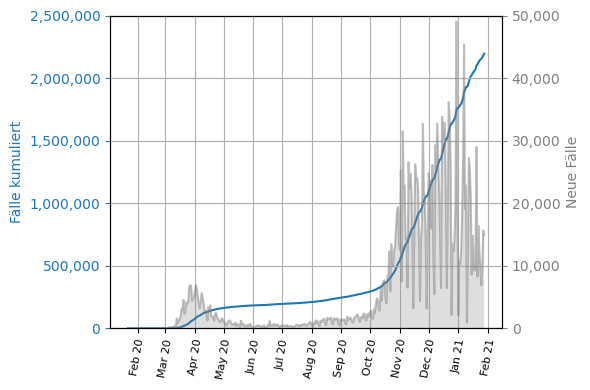

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as tkr 

# Allgemein
plt.style.use('default') # default stil einstellen (auch andere stile z.B. auch "seaborn-darkgrid" möglich )

# Set Figure
fig , ax1 = plt.subplots(figsize=(6,4))

# Plot 1 : ax1 - Fälle kumuliert

# Plot
ax1.plot(Deutschland["Date"],Deutschland["Confirmed"], color='tab:blue')
ax1.grid()

# Plot 2 : ax2 - neue Fälle
ax2 = ax1.twinx()

# Plot
ax2.plot(Deutschland["Date"],Deutschland["New cases"], color='tab:gray', alpha=0.5)
ax2.fill_between(Deutschland["Date"], Deutschland["New cases"], 0, facecolor ='tab:gray', alpha=0.25, zorder=-99) 
ax2.grid()

# Zahlen der y-Achse Tausend mit Komma trennen
ax1.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ",")))
ax2.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ",")))

# Farben der zwei y-Achsen anpassen (mit Beschriftung)
ax1.set_ylabel("Fälle kumuliert", color='tab:blue')
ax2.set_ylabel('Neue Fälle', color='tab:gray')
ax1.tick_params(colors='tab:blue', which='both', axis="y") 
ax2.tick_params(colors='tab:gray', which='both', axis="y") 

# y ticks Anpassen
ax1.set_ylim(bottom=0, top=2.5e6) # Achse 1 Limits
ax2.set_ylim(bottom=0, top=0.05e6) # Achse 2 Limits

nticks=6 # Anzahl Ticks für Achse 1 und 2
ax1.yaxis.set_major_locator(tkr.LinearLocator(nticks))
ax2.yaxis.set_major_locator(tkr.LinearLocator(nticks))

# x ticks Anpassen
ax1.xaxis.set_major_locator(dates.MonthLocator(interval=1)) # jeden Monat ein Tick
ax1.xaxis.set_major_formatter(dates.DateFormatter('%b %y')) # Darstellung Monatsnamekurz + Jahr

# x Tick Schrift Formatierung (Variante 1: eigene Einstellungen)
labels = ax1.get_xticklabels(); # labels auslesen um diese noch mal zu formatieren
plt.setp(labels, rotation=80, fontsize=8); # Labels drehen

# x Tick Schrift Formatierung (Variante 2: automatisch)
#fig.autofmt_xdate()

plt.tight_layout()
plt.show()

### gleitenden Mittelwert (7 Tage hinzufügen)

In [17]:
Deutschland['New Cases rolling mean (7)'] = Deutschland['New cases'].rolling(7).mean()

Den Mittelwert plotten wir zu den neuen Fällen als weitere Linie

`ax2.plot(Deutschland["Date"],Deutschland["New Cases rolling mean (7)"], label="Neue Fälle (rollender Mittelwert 7 Tage)", color="black", alpha=1)`

Weiterhin führen wir labels für "neue Fälle" und den gleiteneden Mittelwert ein und zeigen diesen mit `ax2.legend()` an.


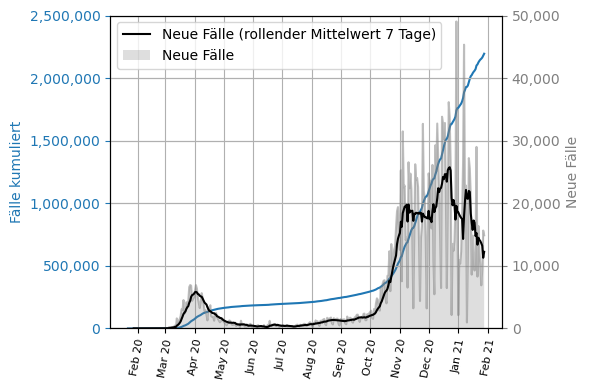

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as tkr 

# Allgemein
plt.style.use('default') # default stil einstellen (auch andere stile z.B. auch "seaborn-darkgrid" möglich )

# Set Figure
fig , ax1 = plt.subplots(figsize=(6,4))

# Plot 1 : ax1 - Fälle kumuliert

# Plot
ax1.plot(Deutschland["Date"],Deutschland["Confirmed"], color='tab:blue')
ax1.grid()

# Plot 2 : ax2 - neue Fälle
ax2 = ax1.twinx()

# Plot
ax2.plot(Deutschland["Date"],Deutschland["New cases"], color='tab:gray', alpha=0.5)
ax2.fill_between(Deutschland["Date"], Deutschland["New cases"], 0, facecolor ='tab:gray', alpha=0.25, zorder=-99, label="Neue Fälle") 
ax2.plot(Deutschland["Date"],Deutschland["New Cases rolling mean (7)"], label="Neue Fälle (rollender Mittelwert 7 Tage)", color="black", alpha=1)

ax2.legend()
ax2.grid()

# Zahlen der y-Achse Tausend mit Komma trennen
ax1.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ",")))
ax2.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ",")))

# Farben der zwei y-Achsen anpassen (mit Beschriftung)
ax1.set_ylabel("Fälle kumuliert", color='tab:blue')
ax2.set_ylabel('Neue Fälle', color='tab:gray')
ax1.tick_params(colors='tab:blue', which='both', axis="y") 
ax2.tick_params(colors='tab:gray', which='both', axis="y") 

# y ticks Anpassen
ax1.set_ylim(bottom=0, top=2.5e6) # Achse 1 Limits
ax2.set_ylim(bottom=0, top=0.05e6) # Achse 2 Limits

nticks=6 # Anzahl Ticks für Achse 1 und 2
ax1.yaxis.set_major_locator(tkr.LinearLocator(nticks))
ax2.yaxis.set_major_locator(tkr.LinearLocator(nticks))

# x ticks Anpassen
ax1.xaxis.set_major_locator(dates.MonthLocator(interval=1)) # jeden Monat ein Tick
ax1.xaxis.set_major_formatter(dates.DateFormatter('%b %y')) # Darstellung Monatsnamekurz + Jahr

# x Tick Schrift Formatierung (Variante 1: eigene Einstellungen)
labels = ax1.get_xticklabels(); # labels auslesen um diese noch mal zu formatieren
plt.setp(labels, rotation=80, fontsize=8); # Labels drehen

# x Tick Schrift Formatierung (Variante 2: automatisch)
#fig.autofmt_xdate()

plt.tight_layout()
plt.show()

#### finale Spielerei

- seaborn stil verwendet
- Lockdown eingezeichnet
- Achsen getauscht
- Legende hinzugefügt

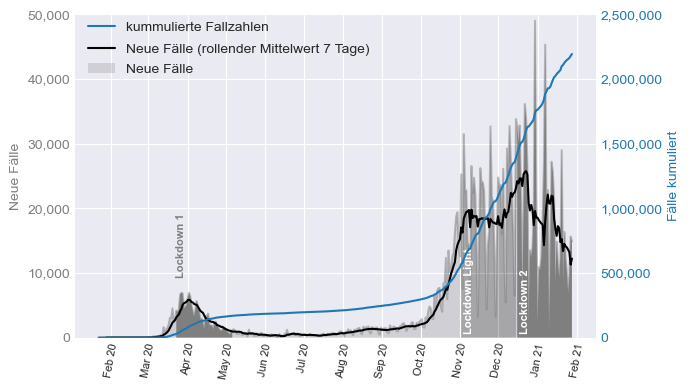

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as tkr 

# Allgemein
plt.style.use('seaborn-darkgrid') # default stil einstellen (auch andere stile z.B. auch "seaborn-darkgrid" möglich )

# Set Figure
fig , ax1 = plt.subplots(figsize=(7,4))


# Plot 1 : ax1 - neue Fälle

# Plot
ax1.plot(Deutschland["Date"],Deutschland["New cases"], color='tab:gray', alpha=0.5)
ax1.fill_between(Deutschland["Date"], Deutschland["New cases"], 0, facecolor ='tab:gray', alpha=0.25, zorder=-99, label="Neue Fälle") 
ax1.plot(Deutschland["Date"],Deutschland["New Cases rolling mean (7)"], label="Neue Fälle (rollender Mittelwert 7 Tage)", color="black", alpha=1)

# Plot 2 : ax2 - Fälle kumuliert
ax2 = ax1.twinx()

# Plot
ax2.plot(Deutschland["Date"],Deutschland["Confirmed"], color='tab:blue',label="kummulierte Fallzahlen", zorder=99)
ax2.grid()

# Legenden
ax1.legend(bbox_to_anchor=(0, 0.95), loc='upper left')
ax2.legend(bbox_to_anchor=(0, 0.9), loc='lower left')

# Lockdowns einzeichnen
Lockdown1=Deutschland.loc[(Deutschland["Date"] >= "2020-03-23") & (Deutschland["Date"] <= "2020-05-06")]
ax1.fill_between(Lockdown1["Date"], Lockdown1["New cases"], 0, facecolor ='tab:gray', alpha=1) 
ax1.text(dates.date2num(Lockdown1.iloc[0,0]), Lockdown1.iloc[0,6]+5000, 'Lockdown 1', fontsize=8,  color='tab:gray', alpha=1, rotation=90, ha="left", va="bottom", weight='bold')

Lockdown2L=Deutschland.loc[(Deutschland["Date"] >= "2020-11-02") & (Deutschland["Date"] <= "2020-12-15")]
ax1.fill_between(Lockdown2L["Date"], Lockdown2L["New cases"], 0, facecolor ='tab:gray', alpha=0.5) 
ax1.text(dates.date2num(Lockdown2L.iloc[2,0]), 500, 'Lockdown Light', fontsize=8,  color='white', alpha=1, rotation=90, ha="left", va="bottom", weight='bold')

Lockdown2=Deutschland.loc[(Deutschland["Date"] >= "2020-12-16")]
ax1.fill_between(Lockdown2["Date"], Lockdown2["New cases"], 0, facecolor ='tab:gray', alpha=1) 
ax1.text(dates.date2num(Lockdown2.iloc[2,0]), 500, 'Lockdown 2', fontsize=8,  color='white', alpha=1, rotation=90, ha="left", va="bottom", weight='bold')


# Zahlen der y-Achse Tausend mit Komma trennen
ax1.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ",")))
ax2.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ",")))

# Farben der zwei y-Achsen anpassen (mit Beschriftung)
ax1.set_ylabel('Neue Fälle', color='tab:gray')
ax2.set_ylabel("Fälle kumuliert", color='tab:blue')
ax1.tick_params(colors='tab:gray', which='both', axis="y") 
ax2.tick_params(colors='tab:blue', which='both', axis="y") 

# y ticks Anpassen
ax1.set_ylim(bottom=0, top=0.05e6) # Achse 2 Limits
ax2.set_ylim(bottom=0, top=2.5e6) # Achse 1 Limits

nticks=6 # Anzahl Ticks für Achse 1 und 2
ax1.yaxis.set_major_locator(tkr.LinearLocator(nticks))
ax2.yaxis.set_major_locator(tkr.LinearLocator(nticks))

# x ticks Anpassen
ax1.xaxis.set_major_locator(dates.MonthLocator(interval=1)) # jeden Monat ein Tick
ax1.xaxis.set_major_formatter(dates.DateFormatter('%b %y')) # Darstellung Monatsnamekurz + Jahr

# x Tick Schrift Formatierung (Variante 1: eigene Einstellungen)
labels = ax1.get_xticklabels(); # labels auslesen um diese noch mal zu formatieren
plt.setp(labels, rotation=80, fontsize=8); # Labels drehen

# x Tick Schrift Formatierung (Variante 2: automatisch)
#fig.autofmt_xdate()

plt.tight_layout()
plt.show()